In [97]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Loading the dataset
titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Exploring the Dataset

In [62]:
# Check the number of rows and columns
print("Shape:", titanic.shape)

Shape: (891, 15)


In [65]:
# Listing all columns
print("Columns:", titanic.columns.tolist())

Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [66]:
# Summary information about the dataset
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [68]:
# Summary statistics for numerical columns
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [69]:
# Checking for missing values
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Handling Missing Values

In [71]:
# calculating percentage of missing values
missing_percentage = (titanic.isnull().sum()/len(titanic)*100)

In [72]:
missing_percentage

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [73]:
# Since 77.2% of the deck column is missing, it's best to drop it
titanic.drop(columns=['deck'])

In [76]:
# age (19.86% missing) → Filling with the median age.
# embarked & embark_town (0.22% missing) → Filling with the most common value (mode).
titanic['age'].fillna(titanic['age'].median())
titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [77]:
# Verifying missing values again
print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


Data Type Conversion and Optimization

In [78]:
# checking for current data types
print(titanic.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object


In [88]:
# Converting integer columns to smaller types
titanic['pclass'] = titanic['pclass'].astype('int8')
titanic['survived'] = titanic['survived'].astype('int8')
titanic['sibsp'] = titanic['sibsp'].astype('int8')
titanic['parch'] = titanic['parch'].astype('int8')

In [89]:
# Converting float columns to smaller types
titanic['age'] = titanic['age'].astype('float32')
titanic['fare'] = titanic['fare'].astype('float32')

In [90]:
# Converting categorical/object columns to 'category' type
categorical_cols = ['sex', 'embarked', 'who', 'embark_town', 'alive']
for col in categorical_cols:
    titanic[col] = titanic[col].astype('category')

In [91]:
# Checking new data types
print(titanic.dtypes)

survived           int8
pclass             int8
sex            category
age             float32
sibsp              int8
parch              int8
fare            float32
embarked       category
class          category
who            category
adult_male         bool
embark_town    category
alive          category
alone              bool
dtype: object


In [92]:
# Check memory usage
print(titanic.memory_usage(deep=True))

Index           132
survived        891
pclass          891
sex            1107
age            3564
sibsp           891
parch           891
fare           3564
embarked       1149
class          1162
who            1159
adult_male      891
embark_town    1176
alive          1102
alone           891
dtype: int64


Exploratory Data Analysis (EDA)

In [94]:
# Summary statistics for numerical columns
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019696    1.102743    0.806057   49.693428
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329224


In [96]:
# Summary statistics for categorical columns
print(titanic.describe(include=['category']))

         sex embarked  class  who  embark_town alive
count    891      891    891  891          891   891
unique     2        3      3    3            3     2
top     male        S  Third  man  Southampton    no
freq     577      646    491  537          646   549


Visualizing the Data

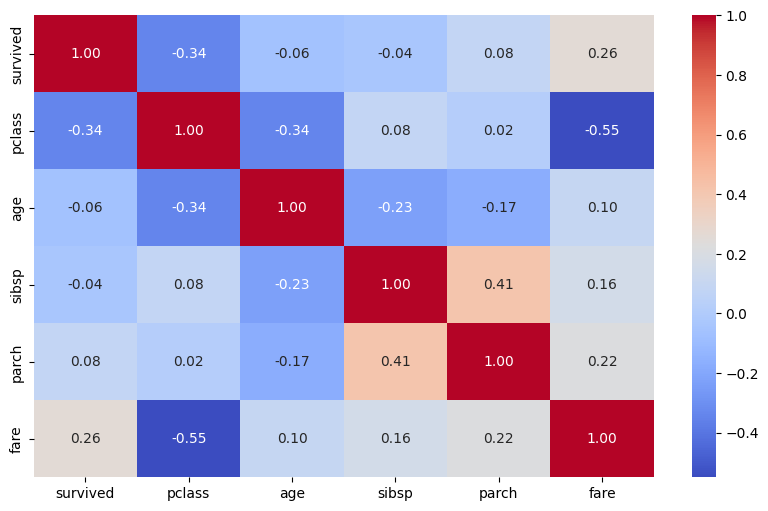

In [99]:
# Select only numerical columns
numerical_columns = titanic.select_dtypes(include=['number']).columns

# Calculate correlation for numerical columns only
plt.figure(figsize=(10, 6))
sns.heatmap(titanic[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

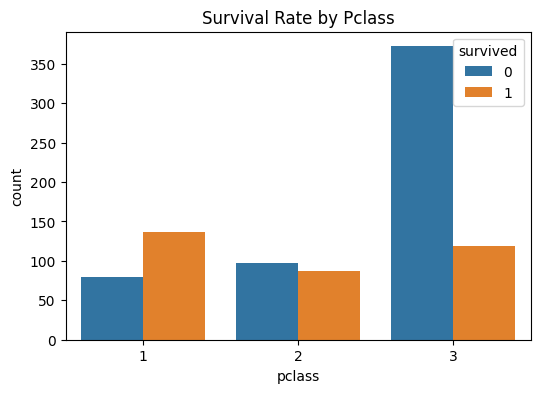

In [100]:
# Survival Rate by Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival Rate by Pclass')
plt.show()


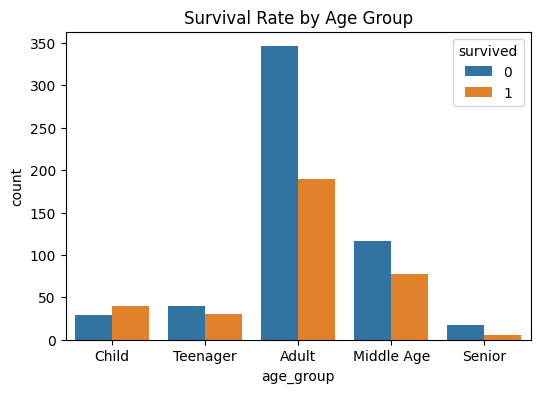

In [101]:
# Create age bins
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']
titanic['age_group'] = pd.cut(titanic['age'], bins=age_bins, labels=age_labels)

# Survival Rate by Age Group
plt.figure(figsize=(6, 4))
sns.countplot(x='age_group', hue='survived', data=titanic)
plt.title('Survival Rate by Age Group')
plt.show()


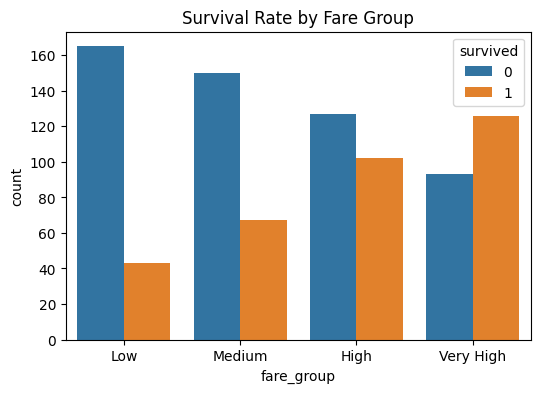

In [102]:
# Create fare bins
fare_bins = [0, 7.91, 14.454, 31, 512]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
titanic['fare_group'] = pd.cut(titanic['fare'], bins=fare_bins, labels=fare_labels)

# Survival Rate by Fare Group
plt.figure(figsize=(6, 4))
sns.countplot(x='fare_group', hue='survived', data=titanic)
plt.title('Survival Rate by Fare Group')
plt.show()


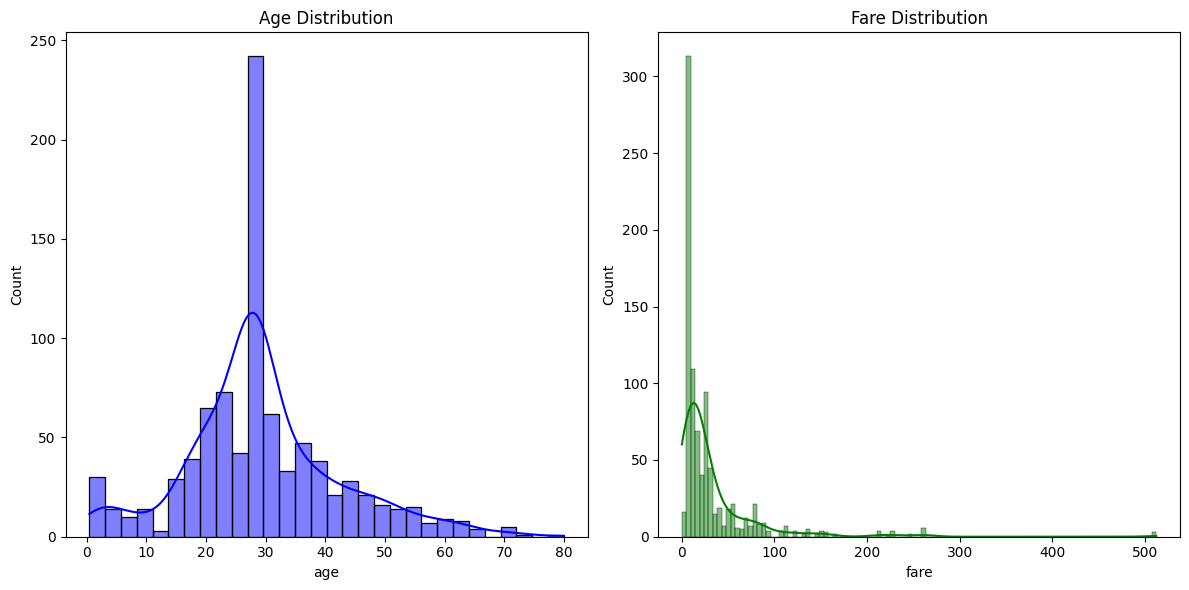

In [108]:
# Visualizing the distribution of numeric features (age, fare)
plt.figure(figsize=(12, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(titanic['age'], kde=True, color='blue')
plt.title('Age Distribution')

# Fare distribution
plt.subplot(1, 2, 2)
sns.histplot(titanic['fare'], kde=True, color='green')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2320\386290709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  embarked_survival = titanic.groupby(['embarked', 'pclass'])['survived'].mean()


embarked  pclass
C         1         0.694118
          2         0.529412
          3         0.378788
Q         1         0.500000
          2         0.666667
          3         0.375000
S         1         0.589147
          2         0.463415
          3         0.189802
Name: survived, dtype: float64


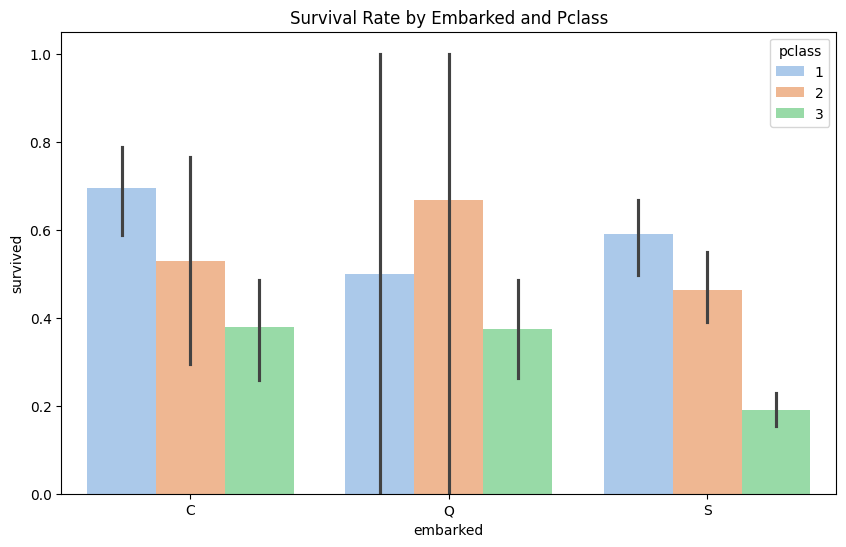

In [110]:
# Survival by Embarked and Pclass
embarked_survival = titanic.groupby(['embarked', 'pclass'])['survived'].mean()
print(embarked_survival)

# Plot survival rate by Embarked and Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='embarked', y='survived', hue='pclass', data=titanic, palette='pastel')
plt.title('Survival Rate by Embarked and Pclass')
plt.show()
